# Red Neuronal Artificial

In [1]:
# MNIST: carga y preprocesamiento
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Reproducibilidad
np.random.seed(42)
keras.utils.set_random_seed(42)

# Cargar MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Escala a [0,1] y aplana a 784
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 28*28)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 28*28)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


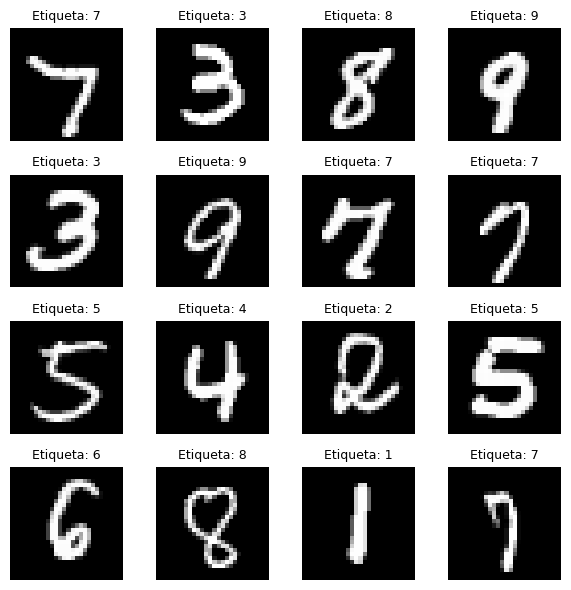

In [3]:
# Seleccionar 16 índices aleatorios
idx = np.random.choice(len(x_train), size=16, replace=False)

# Crear figura
plt.figure(figsize=(6, 6))
for i, k in enumerate(idx):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[k].reshape(28, 28), cmap="gray")
    plt.title(f"Etiqueta: {y_train[k]}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
# Modelo ANN (no como función)
ann = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

ann.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:

history = ann.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    shuffle=True,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9031 - loss: 0.3463 - val_accuracy: 0.9583 - val_loss: 0.1410
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.1476 - val_accuracy: 0.9678 - val_loss: 0.1089
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9689 - loss: 0.1032 - val_accuracy: 0.9705 - val_loss: 0.0986
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0785 - val_accuracy: 0.9705 - val_loss: 0.0985
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0619 - val_accuracy: 0.9715 - val_loss: 0.0963
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0492 - val_accuracy: 0.9720 - val_loss: 0.0966
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0388 - val_accuracy: 0.9738 - val_loss: 0.0938
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0311 - val_accuracy: 0.

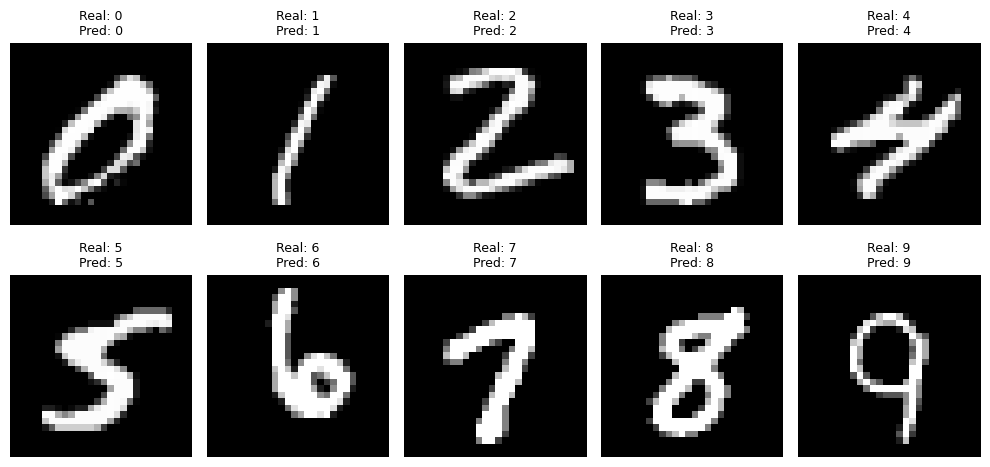

In [6]:
# Visualizando predicciones

y_pred = ann.predict(x_test, verbose=0).argmax(axis=1)

# Mostrar una imagen aleatoria correctamente clasificada por cada dígito (0–9)
plt.figure(figsize=(10, 5))
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    if len(indices) == 0:
        continue
    i = np.random.choice(indices)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {digit}\nPred: {y_pred[i]}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

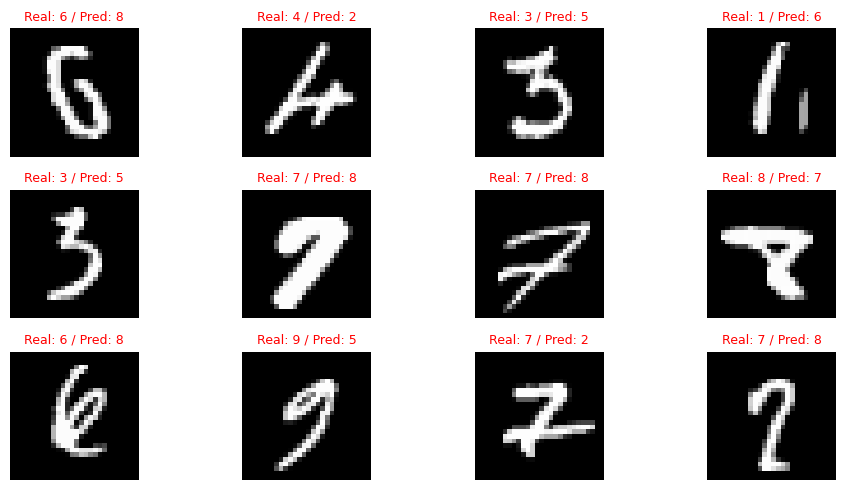

In [7]:
# Índices donde falló
errors = np.where(y_pred != y_test)[0]

# Seleccionar algunos errores aleatorios
n_show = 12
idx = np.random.choice(errors, size=n_show, replace=False)

# Graficar
plt.figure(figsize=(10, 5))
for i, k in enumerate(idx):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[k].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {y_test[k]} / Pred: {y_pred[k]}", color="red", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

## ¿Aún puede mejorar?

In [8]:
# Datos para CNN (28x28x1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

# Modelo CNN
cnn = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=3, activation="relu"),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

cnn.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn = cnn.fit(
    x_train_cnn, y_train,
    epochs=8,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluación CNN
test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"[CNN] Test accuracy: {test_acc_cnn:.4f} | Test loss: {test_loss_cnn:.4f}")

# Comparación con el MLP anterior (si existe)
try:
    test_loss_ann, test_acc_ann = ann.evaluate(x_test, y_test, verbose=0)
    print(f"[ANN] Test accuracy: {test_acc_ann:.4f} | Test loss: {test_loss_ann:.4f}")
    print(f"Mejora absoluta (CNN - ANN): {test_acc_cnn - test_acc_ann:+.4f}")
except NameError:
    pass

Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9184 - loss: 0.2673 - val_accuracy: 0.9843 - val_loss: 0.0557
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9744 - loss: 0.0877 - val_accuracy: 0.9885 - val_loss: 0.0441
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9790 - loss: 0.0685 - val_accuracy: 0.9887 - val_loss: 0.0385
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9898 - val_loss: 0.0351
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9847 - loss: 0.0490 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.9867 - loss: 0.0420 - val_accuracy: 0.9903 - val_loss: 0.0362
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.9903 - val_loss: 0.0359
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accu

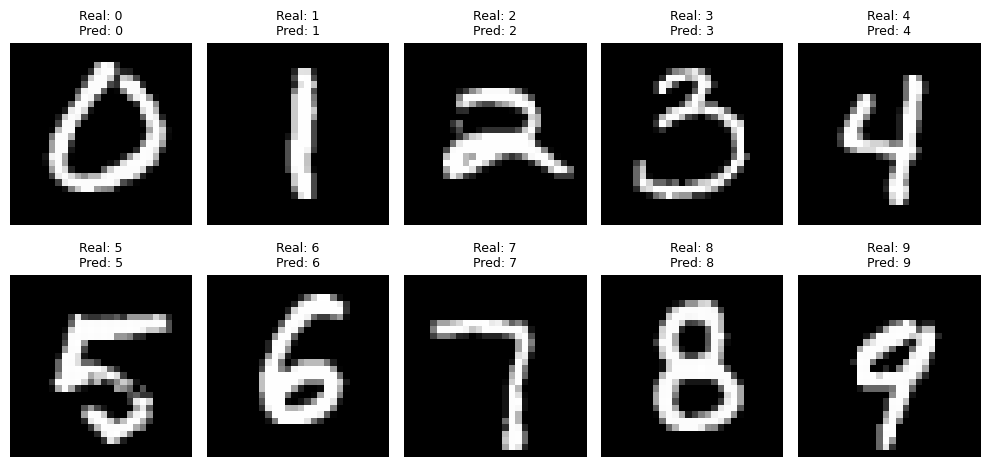

In [9]:
# Predicciones CNN
y_pred_cnn = cnn.predict(x_test_cnn, verbose=0).argmax(axis=1)

# Mostrar una imagen aleatoria correctamente clasificada por cada dígito (0–9)
plt.figure(figsize=(10, 5))
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    if len(indices) == 0:
        continue
    i = np.random.choice(indices)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {digit}\nPred: {y_pred_cnn[i]}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

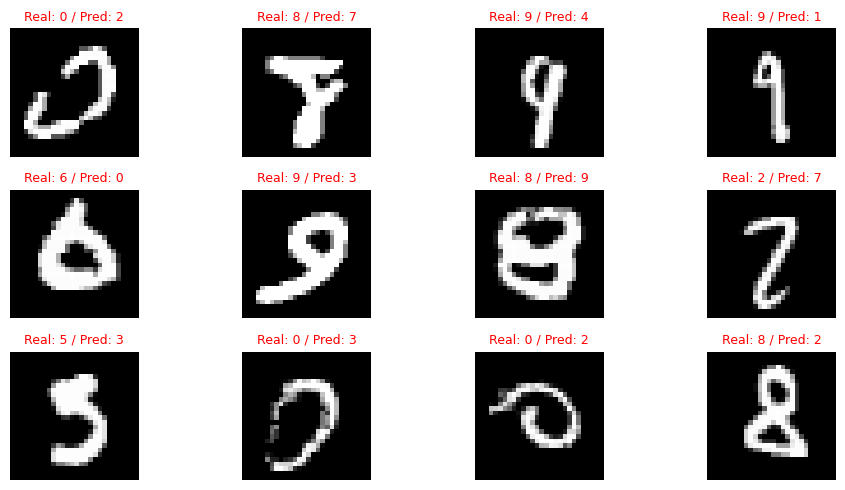

In [10]:
# Mostrar ejemplos donde la CNN se equivocó
errors_cnn = np.where(y_pred_cnn != y_test)[0]

n_show = 12
idx = np.random.choice(errors_cnn, size=n_show, replace=False)

plt.figure(figsize=(10, 5))
for i, k in enumerate(idx):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(x_test_cnn[k].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {y_test[k]} / Pred: {y_pred_cnn[k]}", color="red", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()